## SVM - Forest Fire Data
Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#import WARNING
import warnings
warnings.filterwarnings('ignore')

## Lodaing Data

In [2]:
df1 = pd.read_csv('SalaryData_Train(1).csv')
df2 = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# 1. Info

In [3]:
#info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


## 2. Shape

In [5]:
df1.shape

(30161, 14)

In [6]:
df2.shape

(15060, 14)

## 3. Null Values

In [7]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## 4. Check any duplicaties

In [9]:
df1.duplicated().sum()

3258

## There are 3258 dublicates in the train data

In [10]:
df2.duplicated().sum()

930

### There are 930 duplicates in test data

# 5. Droping Duplicate Data in Train and Test dataset

In [11]:
df1 = df1.drop_duplicates()

In [12]:
df1.duplicated().sum()

0

In [13]:
df2 = df2.drop_duplicates()

In [14]:
df2.duplicated().sum()

0

## 6. Description on Train Data


In [15]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# 7. Correlation between Numerical Features

In [16]:
df1['Salary1']= pd.get_dummies(df1['Salary'], drop_first=True)

In [19]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Salary1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [17]:
df1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary1
age,1.000000,0.038048,0.077235,0.052684,0.072529,0.223502
educationno,0.038048,1.000000,0.126085,0.080025,0.145491,0.332178
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403,0.228865
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093,0.153287
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000,0.225812
Salary1,0.223502,0.332178,0.228865,0.153287,0.225812,1.000000


###### Correlation on dependent feature "Salary"

In [18]:
df1.corr()['Salary1']

age             0.223502
educationno     0.332178
capitalgain     0.228865
capitalloss     0.153287
hoursperweek    0.225812
Salary1         1.000000
Name: Salary1, dtype: float64

# EDA

In [19]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

In [20]:
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [21]:
for feature in features:
    unique_features = df1[feature].unique()
    num_features = df1[feature].nunique()
    
    if num_features <= 10:
        print('{} has {} values as {}'.format(feature, num_features, unique_features))
    else:
         print('{} has {} values as {}......'.format(feature, num_features, unique_features[0:10]))

age has 72 values as [39 50 38 53 28 37 49 52 31 42]......
workclass has 7 values as [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education has 16 values as [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc']......
educationno has 16 values as [13  9  7 14  5 10 12  4 16 11]......
maritalstatus has 7 values as [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation has 14 values as [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support']......
relationship has 6 values as [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race has 5 values as [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex has 2 value

In [22]:
df1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [23]:
df1['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

## Droping Education Column from Data

In [24]:
df1 = df1.drop('education', axis=1)
df2 = df2.drop('education', axis=1)

## Visualization

In [25]:
df1.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

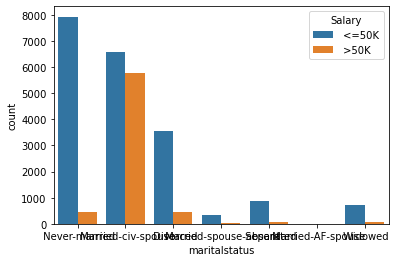

In [26]:
sns.countplot(df1['maritalstatus'],hue=df1['Salary'])

<AxesSubplot:xlabel='race', ylabel='count'>

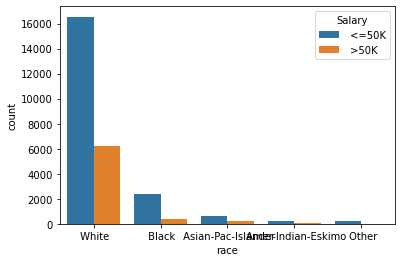

In [27]:
sns.countplot(df1['race'],hue=df1['Salary'])

<AxesSubplot:xlabel='sex', ylabel='count'>

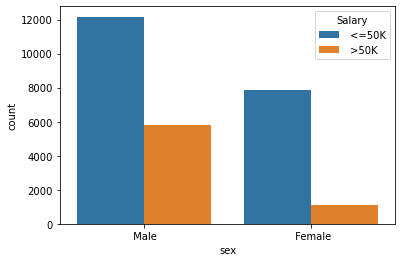

In [28]:
sns.countplot(df1['sex'],hue=df1['Salary'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

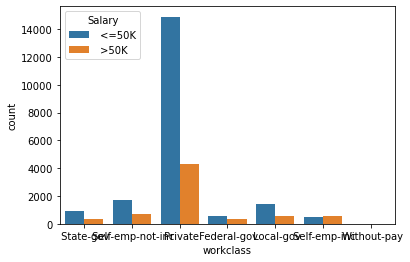

In [29]:
sns.countplot(df1['workclass'],hue=df1['Salary'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

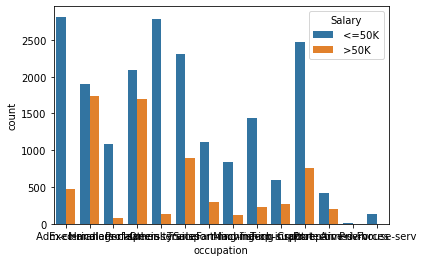

In [30]:
sns.countplot(df1['occupation'],hue=df1['Salary'])

<AxesSubplot:xlabel='age', ylabel='Density'>

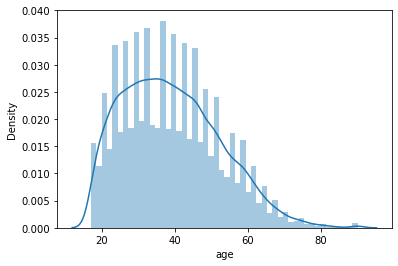

In [31]:
sns.distplot(df1['age'])

<AxesSubplot:xlabel='age'>

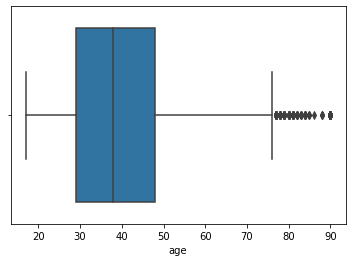

In [32]:
sns.boxplot(df1['age'])



###### We can see there are some outliers in the age column

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

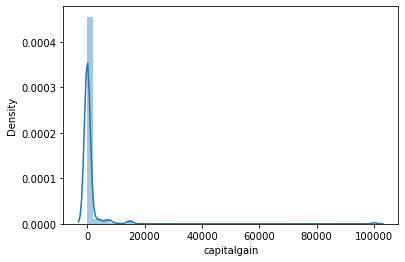

In [33]:
sns.distplot(df1['capitalgain'])

<AxesSubplot:xlabel='capitalgain'>

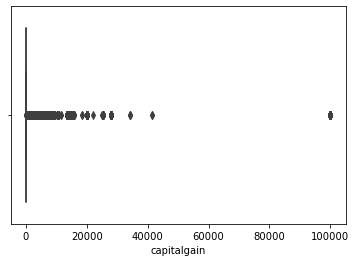

In [34]:
sns.boxplot(df1['capitalgain'])

###### Even capitalgain column has outliers

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

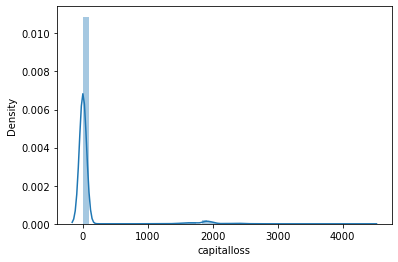

In [35]:
sns.distplot(df1['capitalloss'])

<AxesSubplot:xlabel='capitalloss'>

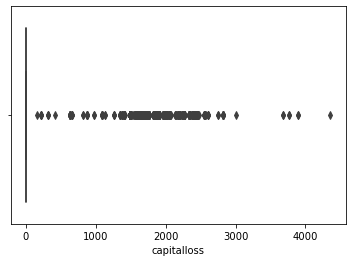

In [36]:
sns.boxplot(df1['capitalloss'])

###### compared to capitalgain there are more otuliers on the capitalloss column

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

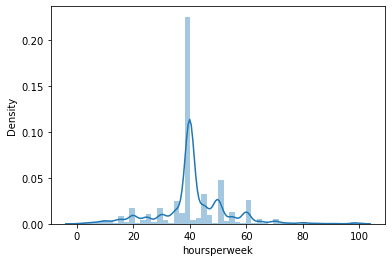

In [37]:
sns.distplot(df1['hoursperweek'])

<AxesSubplot:xlabel='hoursperweek'>

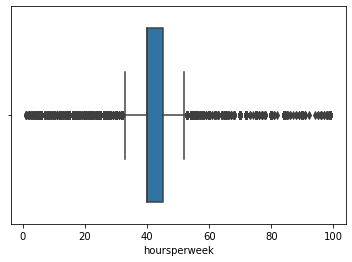

In [38]:
sns.boxplot(df1['hoursperweek'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

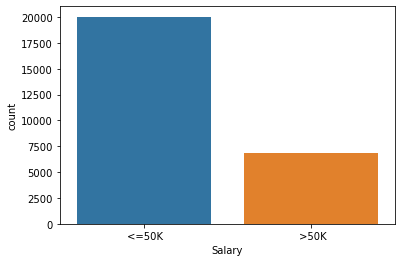

In [39]:
sns.countplot(df1['Salary'])

<AxesSubplot:ylabel='Salary'>

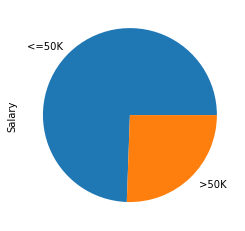

In [40]:
df1['Salary'].value_counts().plot(kind= 'pie')

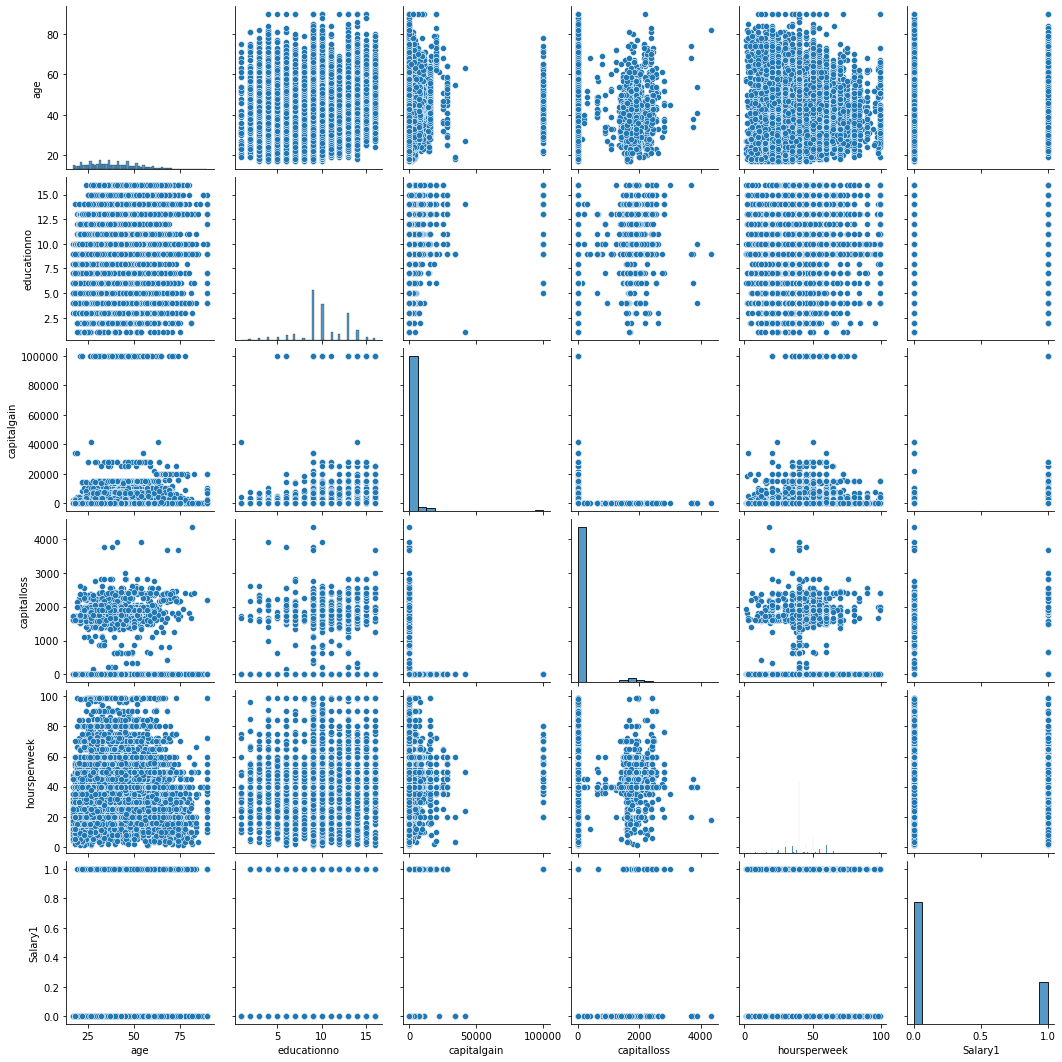

In [41]:
sns.pairplot(df1)

## Featrue Engineering

In [44]:
#Split Data
X = df1.drop(['Salary','Salary1'], axis=1)
y = df1['Salary']

In [45]:
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [46]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [47]:
y.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

## Pipeline for Preporcessing and Calassification

In [48]:
X.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native'],
      dtype='object')

#### Numerical Transformation

In [49]:
num_col = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
Numerical_Trans = MinMaxScaler()

#### Categorical Transformer

In [50]:
cat_col = ['workclass','educationno','maritalstatus', 'occupation','relationship', 'race', 'sex', 'native']
Catigorical_Trans = OneHotEncoder(handle_unknown='ignore')

#### Now lets transform numerical and categirical with Column Transformer


In [51]:
preprocessor = ColumnTransformer(transformers=[('num',Numerical_Trans, num_col),('cat',Catigorical_Trans,cat_col)])


#### Pipeline

In [52]:
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

In [53]:
x = pipe.fit_transform(X)

In [54]:
x = x.todense()

#### Train test and Split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [56]:
clf = SVC()


In [57]:
#fit
clf.fit(x_train,y_train)
#model score in 3 digit after decimal
print('Model Scroe: %.3f' % clf.score(x_test,y_test))

Model Scroe: 0.832


## Grid Search CV
Poly Kernel

In [58]:
poly_param = {'kernel': ['poly'], 'gamma': [1, 0.5], 'degree': [2], 'C': [1]}


In [59]:
poly_grid= GridSearchCV(clf, param_grid=poly_param, cv=3)
poly_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2], 'gamma': [1, 0.5],
                         'kernel': ['poly']})

In [60]:
poly_grid.best_params_, poly_grid.best_score_


({'C': 1, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, 0.8381191339094879)

# Radial basis function kernel (rbf)


In [61]:
rbf_param = {'kernel': ['rbf'], 'gamma': [10, 6, 4, 1, 0.5 ],'C': [10, 5, 1, 0.1]}


In [62]:
rbf_grid = GridSearchCV(clf, param_grid=rbf_param,cv=3)


In [ ]:
rbf_grid.fit(x_train,y_train)


In [ ]:
# Modelling with the optimum parameters
clf= SVC(kernel= 'poly', C= 1, gamma= 0.5, degree= 2)
clf.fit(x_train,y_train)

In [ ]:
# Distributing test data in dependant variable and independant variable
X_test2= df2.drop(['Salary'], axis=1)
y_test2= df2['Salary']

X_test2.head()

In [68]:
X_test2= pipe.transform(X_test2)

NameError: name 'X_test2' is not defined

In [67]:
X_test2= pipe.transform(X_test2)

NameError: name 'X_test2' is not defined

In [66]:
X_test2

NameError: name 'X_test2' is not defined

In [65]:
y_pred= clf.predict(X_test2)
acc= accuracy_score(y_test2, y_pred)
print('Accuracy :', acc)
confusion_matrix(y_test2, y_pred)

NameError: name 'X_test2' is not defined